In [8]:
#Importing libraries
#-------------------
import pandas as pd
import numpy as np                #for mathematical calculations
import seaborn as sns             #for data visualization
import matplotlib.pyplot as plt   #for plotting graph
%matplotlib inline
import warnings                   #to ignore warning
warnings.filterwarnings("ignore")

In [11]:
#Importing data
#--------------
train=pd.read_csv("train.csv")
test =pd.read_csv("test.csv")
train_original = train.copy()
test_orginal = test.copy()

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
train.shape, test.shape

((614, 13), (367, 12))

In [18]:
#univariate analysis
#-------------------
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

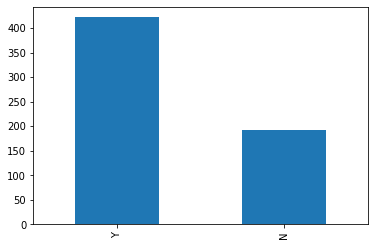

In [20]:
train['Loan_Status'].value_counts().plot.bar()

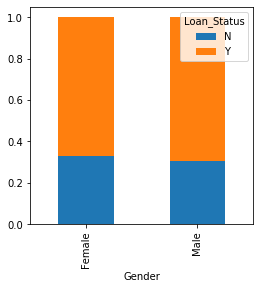

In [25]:
#Bivariate analysis
#------------------
gender =pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

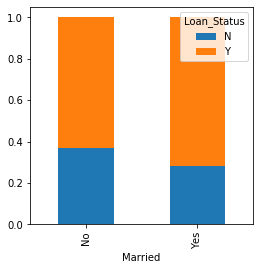

In [26]:
Married =pd.crosstab(train['Married'],train['Loan_Status']) # yes for married is higher
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

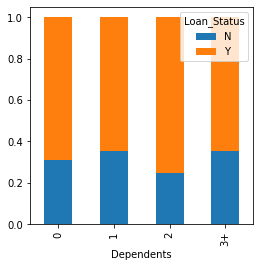

In [27]:
Dependents =pd.crosstab(train['Dependents'],train['Loan_Status']) # one and 3+ applicants category are equal
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

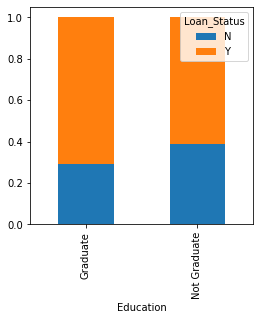

In [28]:
Education =pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

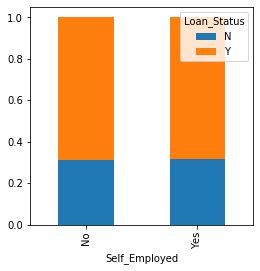

In [29]:
Self_Employed =pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

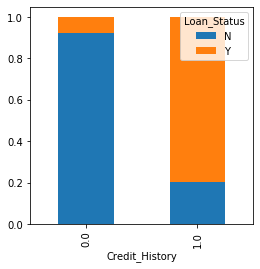

In [30]:
Credit_History =pd.crosstab(train['Credit_History'],train['Loan_Status']) #people with credit history 1 are more likely to get the loan
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

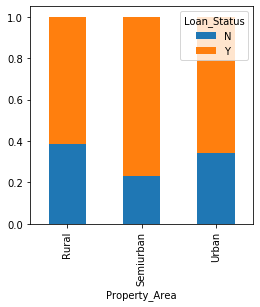

In [31]:
Property_Area =pd.crosstab(train['Property_Area'],train['Loan_Status']) # people in semiurban have higher chance to get the loan
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

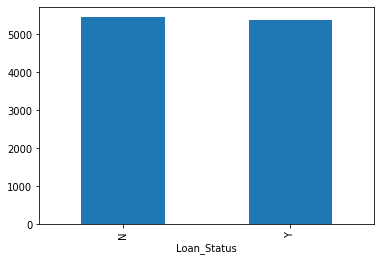

In [32]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

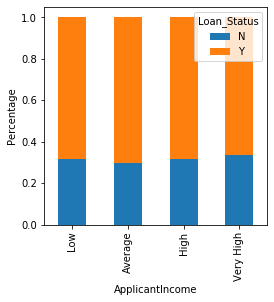

In [36]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_Bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_Bin =pd.crosstab(train['Income_Bin'],train['Loan_Status']) # Applicants income is high then chance of getting loan is high(contradicts our assumption)
Income_Bin.div(Income_Bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

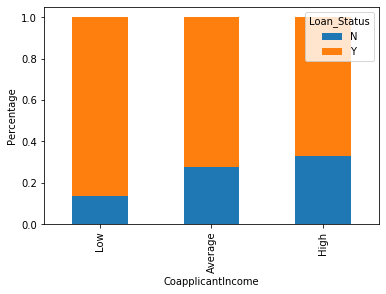

In [43]:
bins =[0,1000,3000,42000]
group=['Low','Average','High']
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
CoapplicantIncome_bin =pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status']) 
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')
#low income then high chance to get approved which is not right

Text(0, 0.5, 'Percentage')

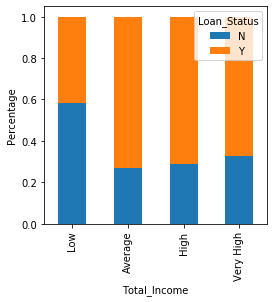

In [46]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_Bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_Bin =pd.crosstab(train['Total_Income_Bin'],train['Loan_Status']) # Applicants income is high then chance of getting loan is high(contradicts our assumption)
Total_Income_Bin.div(Total_Income_Bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')
#Less income then chance of loan getting approved is less

In [47]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'CoapplicantIncome_bin', 'Total_Income',
       'Total_Income_Bin'],
      dtype='object')

In [50]:
train = train.drop(['Income_Bin', 'CoapplicantIncome_bin','Total_Income','Total_Income_Bin'],axis=1)

In [52]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

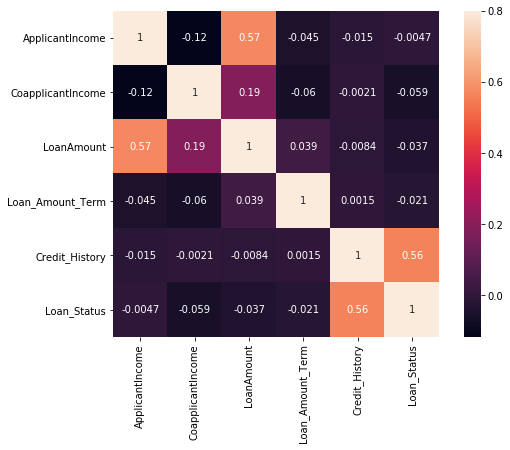

In [56]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap (matrix,annot=True,vmax=.8,square=True)

In [57]:
#Checking missing values
#-----------------------
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
#Treating missing values
#-----------------------
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


In [66]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [67]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [68]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
#missingvalue for test data
#--------------------------
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

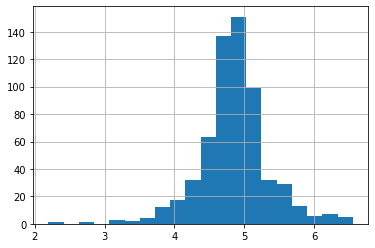

In [71]:
#Outlier treatment
#-----------------
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

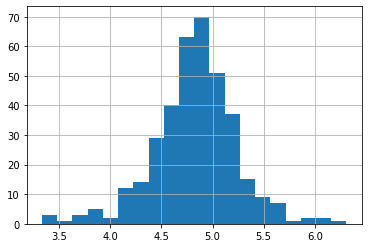

In [72]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

In [73]:
#Model Building
#--------------
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [74]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [84]:
#creating dummy variables
#------------------------
x = pd.get_dummies(x)

In [79]:
#train test split
#----------------
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [85]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [90]:
#predicting for test data
test = pd.get_dummies(test)
pred_test = model.predict(test)

In [96]:
#submission
#----------
sub = pd.read_csv("sample_submission_49d68Cx.csv")
sub['Loan_Status'] = pred_test
sub['Loan_ID'] =test_orginal['Loan_ID']
sub['Loan_Status'].replace(0,'N',inplace= True)
sub['Loan_Status'].replace(1,'Y',inplace= True)

In [97]:
#Exporting data
#--------------
pd.DataFrame(sub,columns=['Loan_Status','Loan_ID']).to_csv('Log.csv')

In [ ]:
#reference
#---------
#https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
#https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/
#https://scikit-learn.org/stable/tutorial/index.html
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html